# SJSU MSDS 255 DL, Spring 2024
Homework 01: Intro to Tensorflow and Pytorch

## Part 1: Tensorflow

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")        # added to suppress warnings b/c laptop does not have GPU/cuda

2024-02-04 19:53:28.205798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Step 1 - Load CSV into numpy array

In [2]:
df = pd.read_csv('diabetes.csv')

## Step 2 - Explore and preprocess data

In [3]:
df

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1
...,...,...,...,...,...,...,...,...,...
753,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1
754,-0.764706,0.226131,0.147541,-0.454545,0.000000,0.096870,-0.776260,-0.800000,1
755,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1
756,-0.882353,0.266332,-0.016393,0.000000,0.000000,-0.102832,-0.768574,-0.133333,0


#### Add header columnn to grab all records

In [4]:
df = pd.concat([df.iloc[0:1], df[1:].reset_index(drop=True)], axis=0)
df.columns = range(len(df.columns))
df

,0,1,2,3,4,5,6,7,8
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
0,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
2,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
3,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1
...,...,...,...,...,...,...,...,...,...
752,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1
753,-0.764706,0.226131,0.147541,-0.454545,0.000000,0.096870,-0.776260,-0.800000,1
754,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1
755,-0.882353,0.266332,-0.016393,0.000000,0.000000,-0.102832,-0.768574,-0.133333,0


#### Check descriptive stats

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

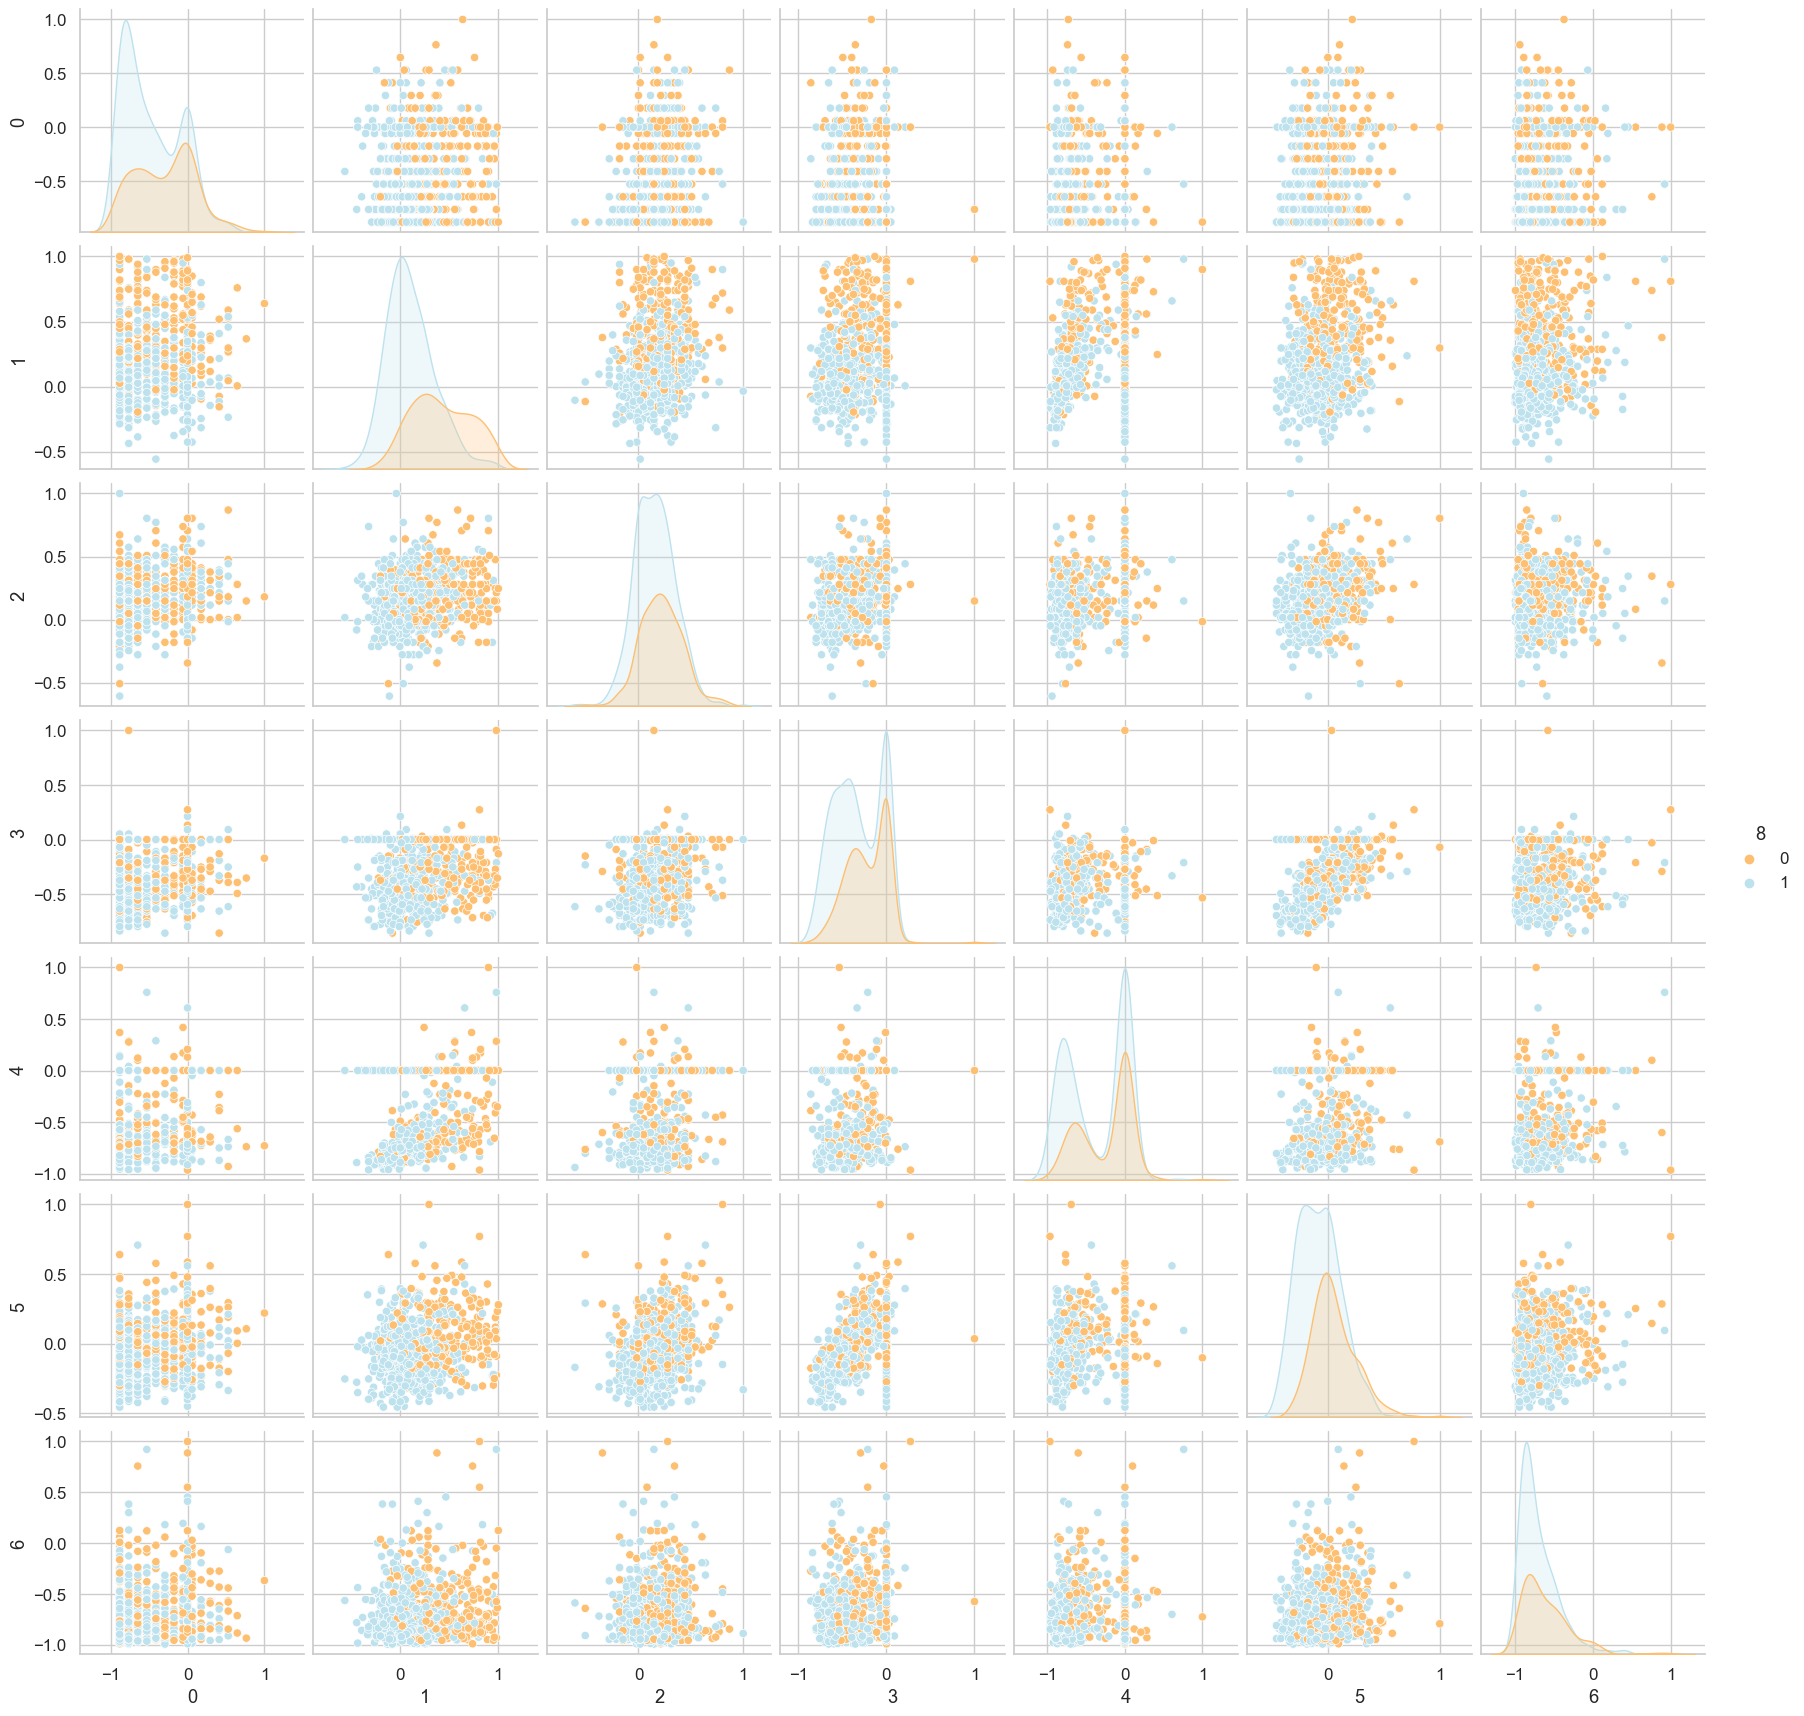

In [7]:
sb.set(font_scale=1.1)
sb.set_style('whitegrid')

grid = sb.pairplot(data=df, vars=df.columns[0:7], hue=df.columns[8], palette='RdYlBu')

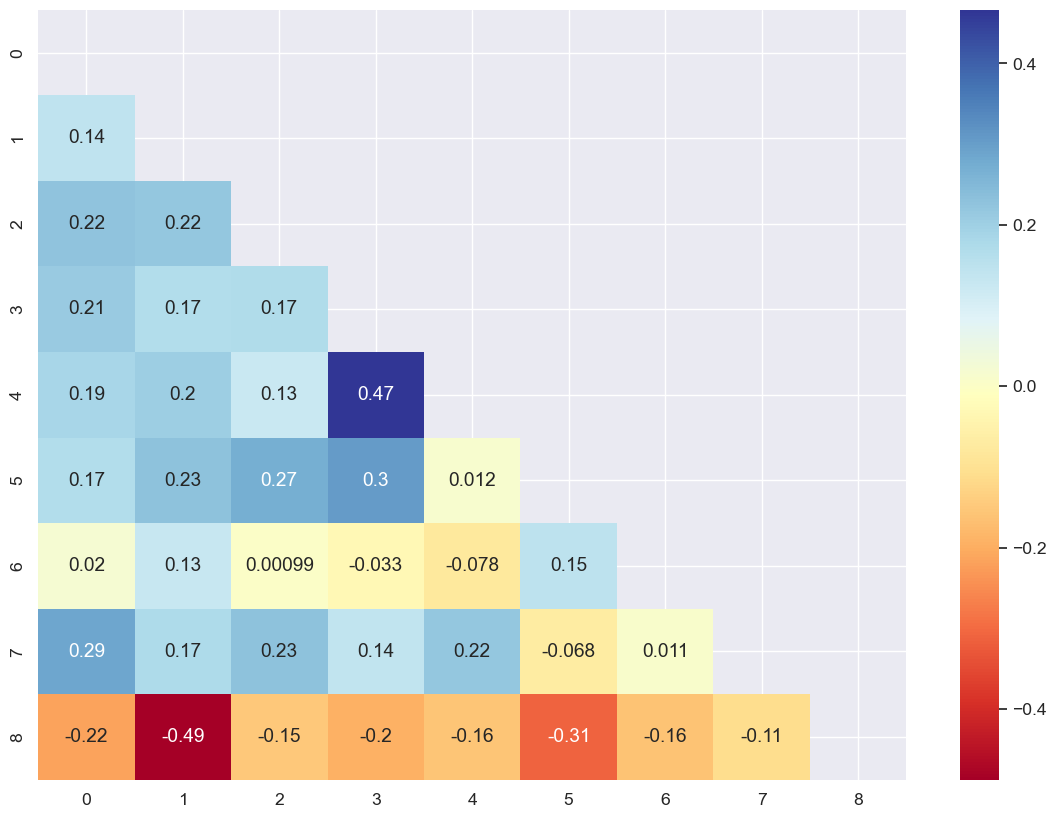

In [8]:
sb.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
crr = df.corr()
mask = np.zeros_like(crr)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(crr, annot = True, linecolor = "black",cmap='RdYlBu', mask=mask ,cbar=True)
plt.show()

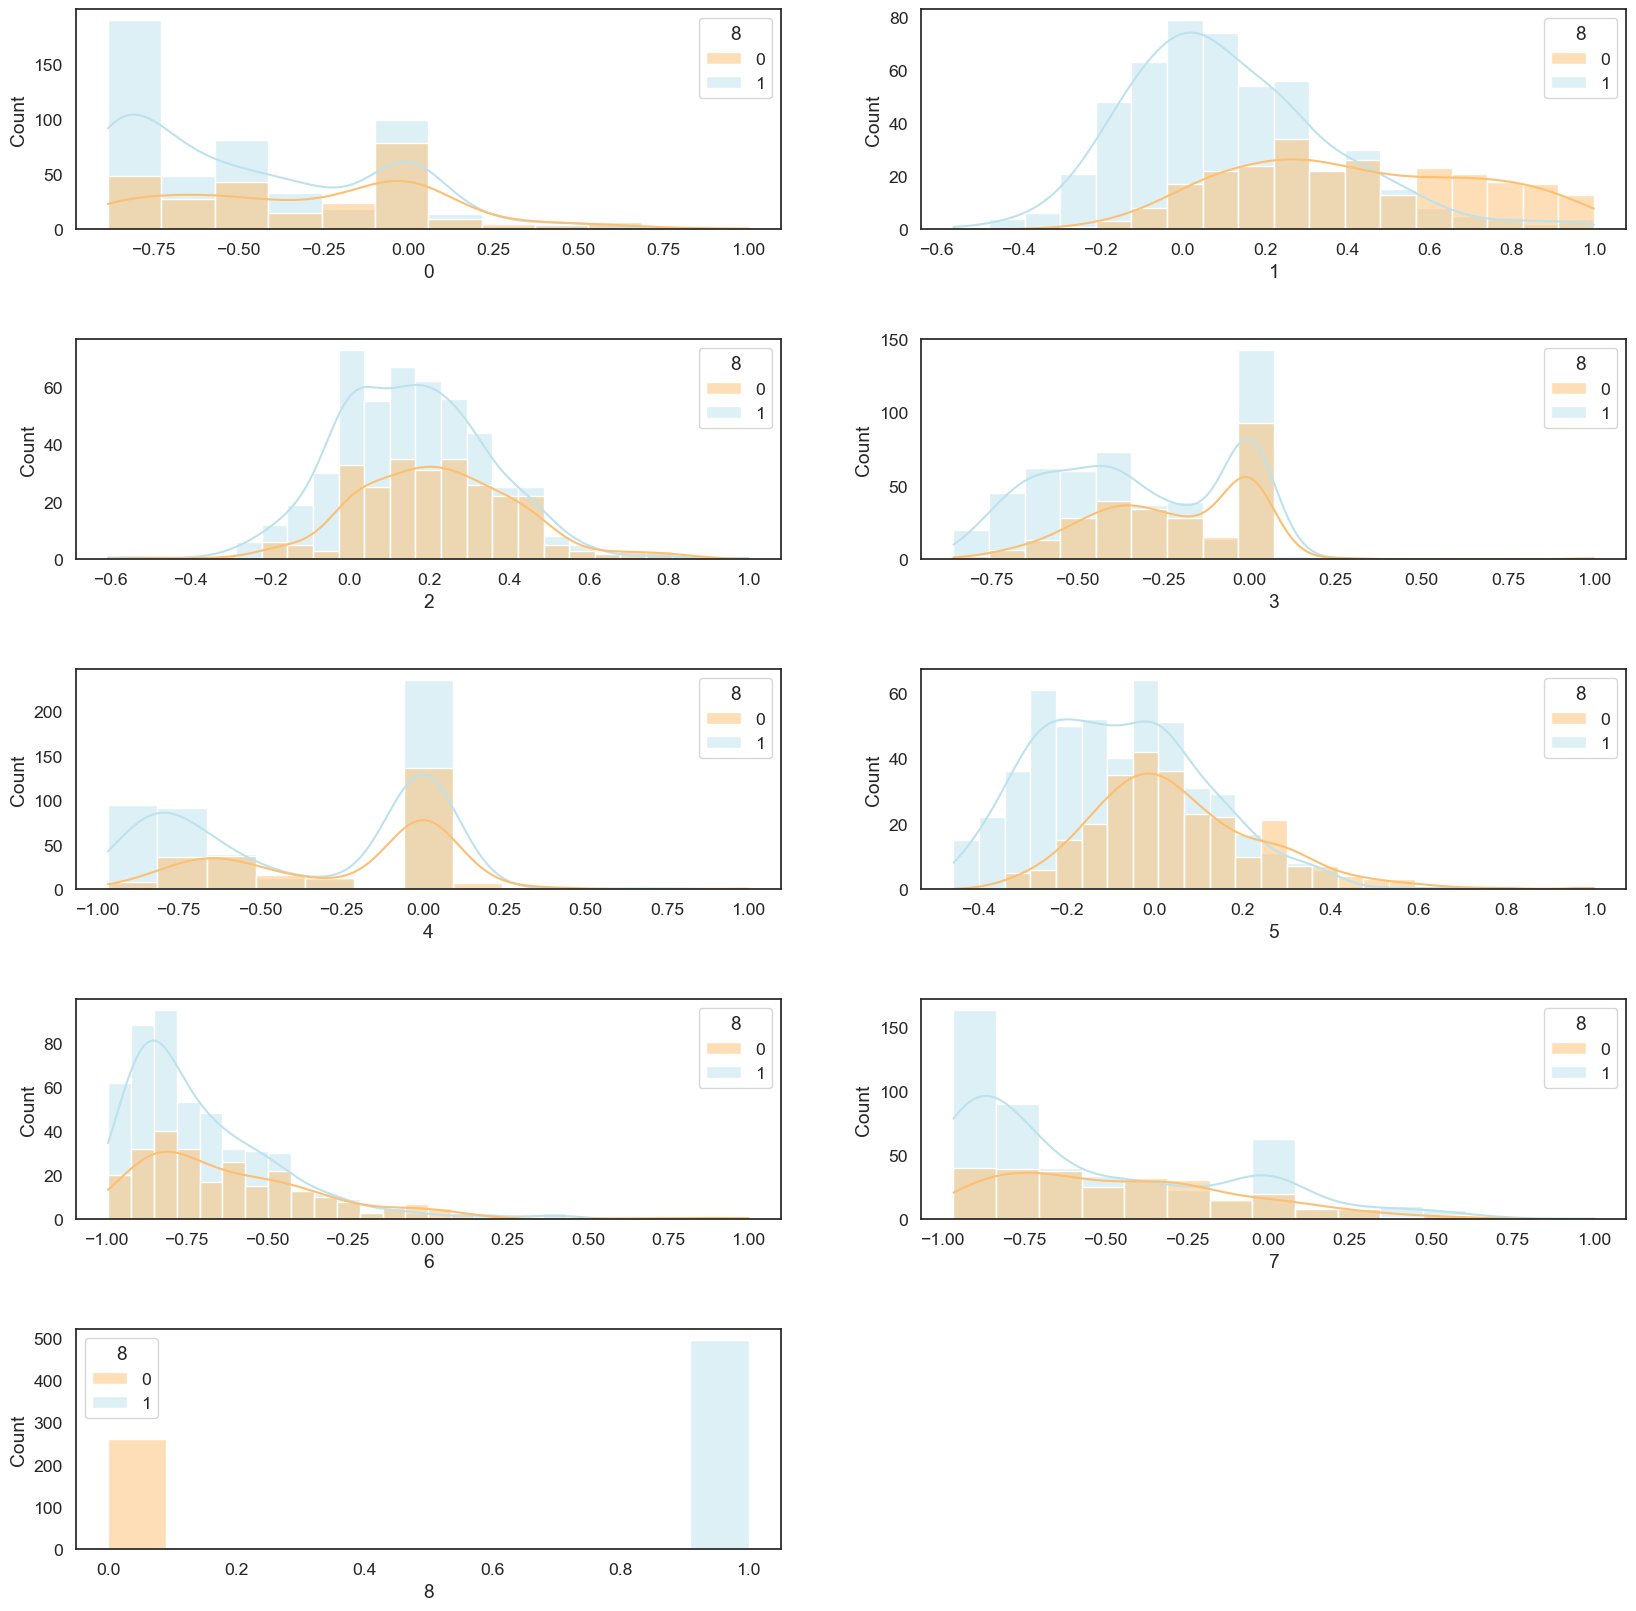

In [9]:
plt.figure(figsize = (20,20))
sb.set_style("white")
sb.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in df.columns:
    plt.subplot(5,2,i)
    sb.histplot(data=df, x=name, hue=df.columns[8],kde=True,palette="RdYlBu")
    i = i + 1

#### Quick data exploration assessement:
Clean data; no nulls. Nine columns, last are labels. Min / Max between -1 and 1. No further normalization expected. 

## Step 3 - Split data 80/20

In [10]:
X = df.drop([df.columns[8]],axis = 1)
y = df[df.columns[8]]
X_train , X_test , y_train , y_test = train_test_split(X,y , train_size = 0.8 , random_state = 42 )

In [11]:
#### NORMALIZING or can use Tanh; Normalized to better fit Sigmoid function
mmc     = MinMaxScaler()
X_train = mmc.fit_transform(X_train)
X_test  = mmc.transform(X_test)

## Step 4 - Create/modify model to ingest data

In [12]:
# Create a linear model
model = keras.Sequential([
    layers.Dense(32, activation='relu', name="layer_1", input_shape=(8,)),  # Input size is (8,) # Hidden layer 1!
    layers.Dense(1, activation='linear',name="output")  # Output layer
], name='CNN_model')

In [13]:
model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 32)                │        288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ output (Dense)                  │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Get Loss from library
example_loss = keras.losses.MeanSquaredError()

# Compile the model
model.compile(optimizer='SGD', loss=example_loss, metrics=['mse'])

## Step 5 - Train model

In [15]:
# Train the model (X_train = inputs; y_train = outputs)
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3477 - mse: 0.3477 - val_loss: 0.3591 - val_mse: 0.3585
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3273 - mse: 0.3273 - val_loss: 0.3493 - val_mse: 0.3486
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3211 - mse: 0.3211 - val_loss: 0.3386 - val_mse: 0.3379
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3016 - mse: 0.3016 - val_loss: 0.3306 - val_mse: 0.3297
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2987 - mse: 0.2987 - val_loss: 0.3196 - val_mse: 0.3188
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2927 - mse: 0.2927 - val_loss: 0.3135 - val_mse: 0.3126
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2823 - mse: 0.2823 - val_loss: 0.3020 - val_mse: 0.3013
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2657 - mse: 0.2657 - val_loss: 0.2954 - val_mse: 0.2946
Epoch 9/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2650 - mse:

<div class="alert alert-block alert-success">
<b>Tensorflow Tip:</b> Creating a Tensorflow model makes it easy to expose the history to visualize and track loss
</div>

In [16]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


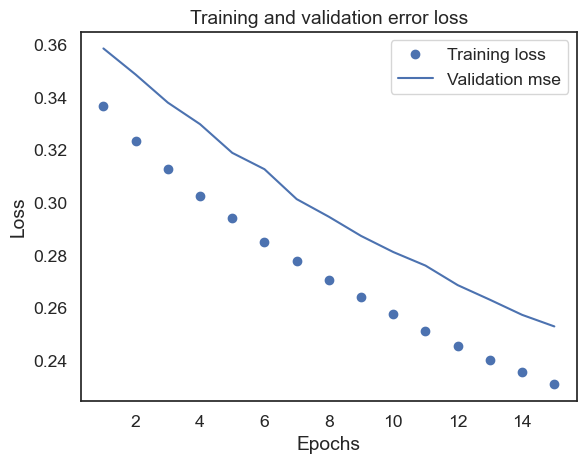

In [17]:
history_dict = history.history
acc = history_dict["mse"]
val_acc = history_dict["val_mse"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training loss")
plt.plot(epochs, val_acc, "b", label="Validation mse")
plt.title("Training and validation error loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Step 6 - Compare predictions to test labels

In [18]:
predict = model.predict(X_test)
predict = (predict >= 0.5).astype(int) # testing for label prediction

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [19]:
print(type(X_test))
print(type(y_test))
print(type(predict))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [20]:
#X_test_arr = X_test.values
y_test_arr = y_test.values.reshape(-1, 1)

In [21]:
print(type(X_test))
print(type(y_test_arr))
print(type(predict))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
print(X_test.shape)
print(y_test_arr.shape)
print(predict.shape)

(152, 8)
(152, 1)
(152, 1)


In [23]:
# Compare predictions with test labels
count = 0
for i in range(len(predict)):
    if i < 15:
        print(f'{i} - Prediction: {predict[i]}   Actual: {y_test_arr[i]}')
    if predict[i] == y_test_arr[i]:
        count += 1
print()
print(f'Correct:  {count} | Total: {len(predict)}')

0 - Prediction: [1]   Actual: [0]
1 - Prediction: [1]   Actual: [0]
2 - Prediction: [1]   Actual: [0]
3 - Prediction: [1]   Actual: [0]
4 - Prediction: [1]   Actual: [1]
5 - Prediction: [1]   Actual: [1]
6 - Prediction: [1]   Actual: [1]
7 - Prediction: [1]   Actual: [1]
8 - Prediction: [1]   Actual: [1]
9 - Prediction: [1]   Actual: [1]
10 - Prediction: [1]   Actual: [1]
11 - Prediction: [1]   Actual: [1]
12 - Prediction: [1]   Actual: [1]
13 - Prediction: [0]   Actual: [0]
14 - Prediction: [1]   Actual: [1]

Correct:  90 | Total: 152


## Step 7 - Accuracy of results

In [24]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss:     {loss}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2506 - mse: 0.2503 
Test Loss:     [0.25400832295417786, 0.25292661786079407]


In [25]:
print(f'Accuracy: {count/len(predict):.4f}')

Accuracy: 0.5921


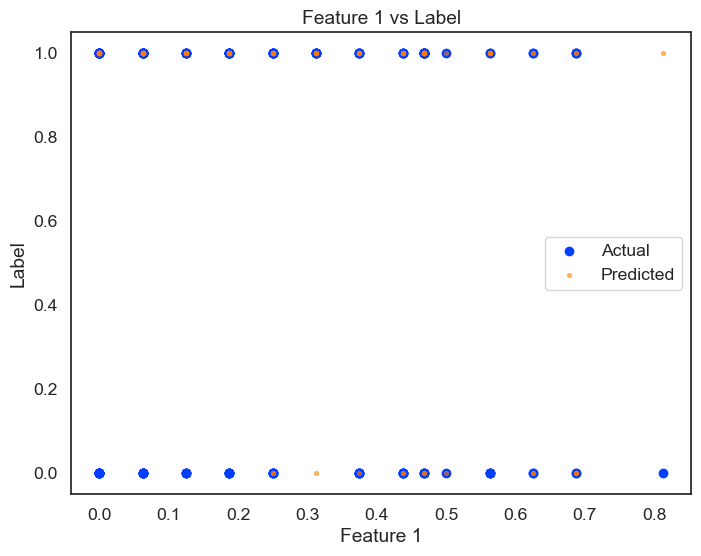

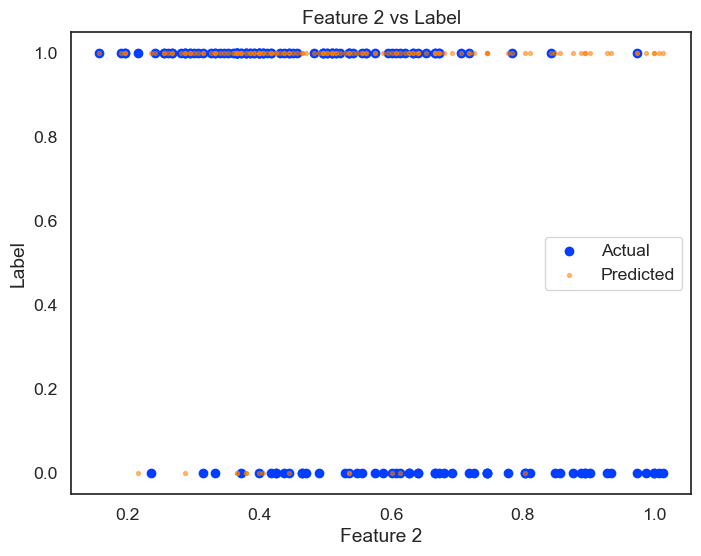

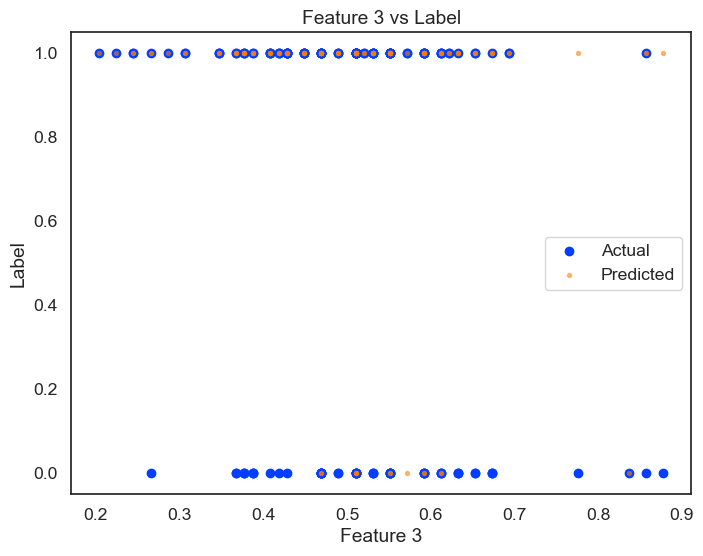

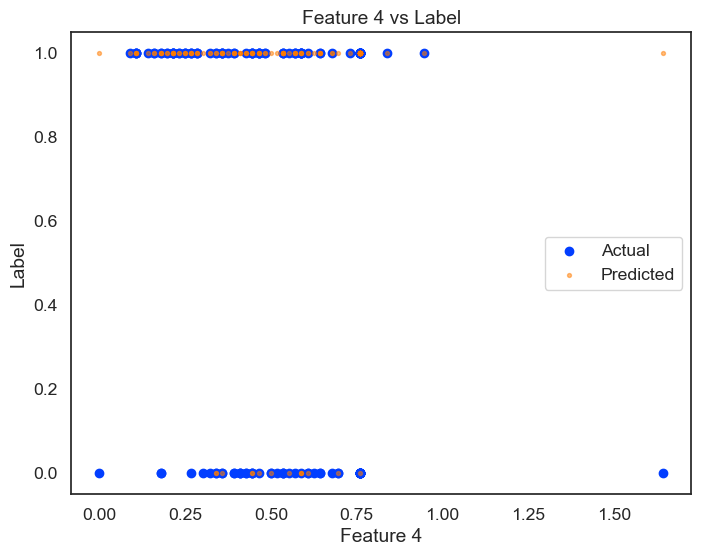

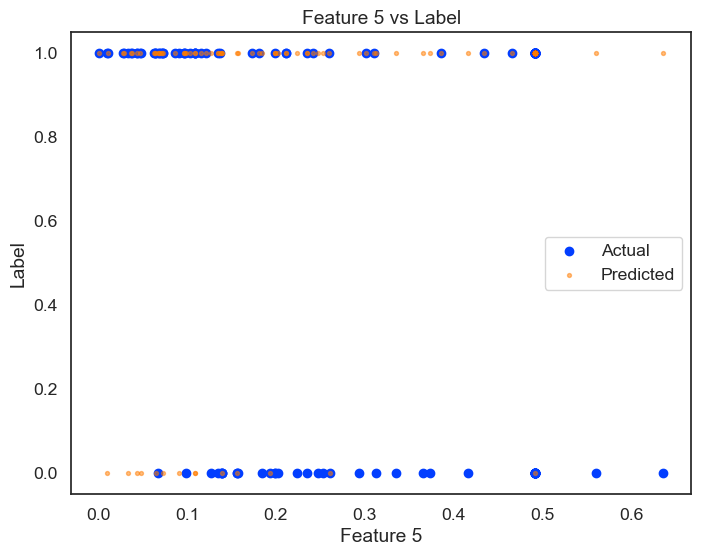

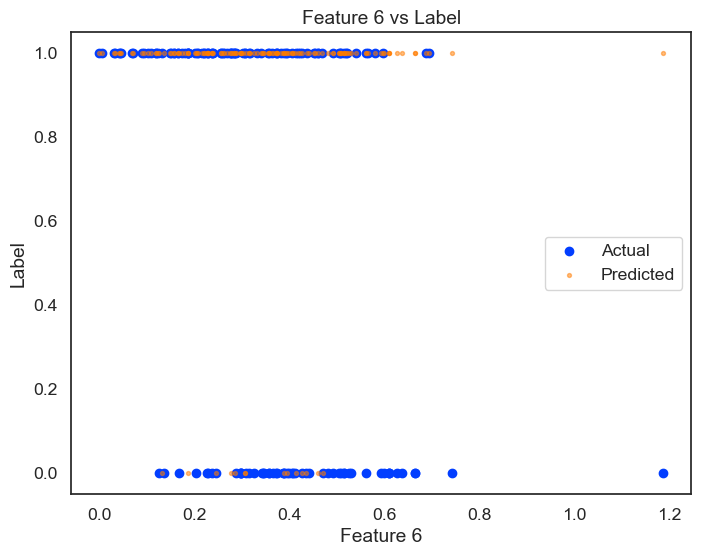

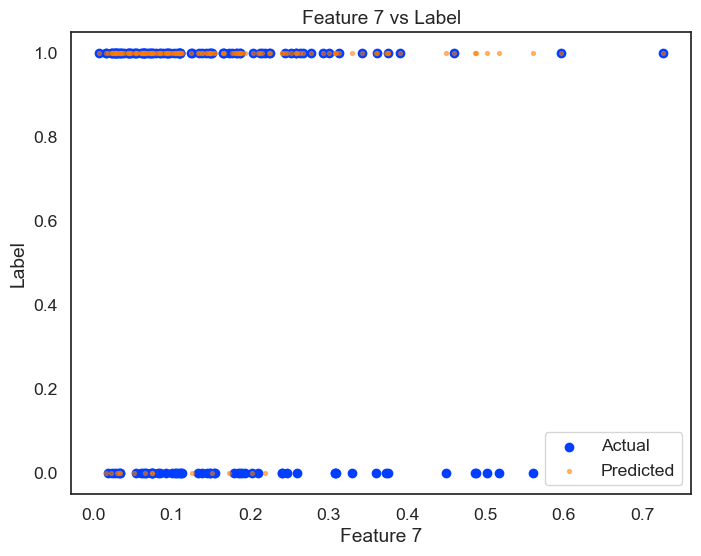

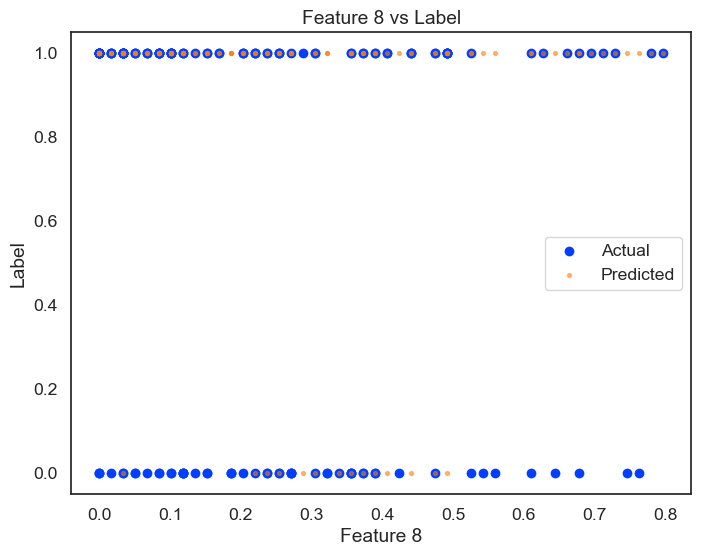

In [26]:
# Visualize predictions vs actual labels
for i in range(8):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, i], y_test_arr, label='Actual')
    plt.scatter(X_test[:, i], predict, alpha=0.5, s=8, label='Predicted')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Label')
    plt.title(f'Feature {i+1} vs Label')
    plt.legend()
    plt.show()

### Step 8 - Hypothesize tuning alterations

<b>Hypothesis:</b> I believe increasing the number of layers of my NN by 2 will increase accuracy and convergence.
<br><b>Test:</b> I will add 3 ReLU neurons and increase my epochs to 50.
<br><b>Validation:</b> I will know my hypothesis is correct if loss deminises and improved predictions match accuracies.

<b>Hypothesis:</b> I believe changing the optimizer will improve accuracy.
<br><b>Test:</b> I will change the optimizer to adam.
<br><b>Validation:</b> I will know my hypothesis is correct if loss deminises and improved predictions match accuracies.

<b>Hypothesis:</b> I believe changing the prediction cut-off argmax evaluator will decrease accuracy.
<br><b>Test:</b> I will change the cut-off to 70%.
<br><b>Validation:</b> I will know my hypothesis is correct if prediction versus actual comparisons change. 

<b>Hypothesis:</b> Because the output result is between 0 and 1, using sigmoid as the output activation function will improve performance.
<br><b>Test:</b> I will change the activation function of the output to sigmoid.
<br><b>Validation:</b> I will know my hypothesis is correct if prediction performace improves over the original model. 

<b>Hypothesis:</b> Because output is single probability with binary classification, MSE is not the best loss function.
<br><b>Test:</b> I will change the optimizer and error metric.
<br><b>Validation:</b> I will know my hypothesis is correct if loss outperforms model with MSE.

### Step 9 - Test hypothesis by training on tuned models

#### Experiment and tune various layers, optimizers, iterations, epochs [repeat steps 5-7]

#### Sigmoid out

In [27]:
# Create a linear model
a_model = keras.Sequential([
    layers.Dense(32, activation='relu', name="layer_1", input_shape=(8,)),  # Input size is (8,) # Hidden layer 1!
    layers.Dense(32, activation='relu', name="layer_2", input_shape=(8,)),  # Input size is (8,) # Hidden layer 2!
    layers.Dense(32, activation='relu', name="layer_3", input_shape=(8,)),  # Input size is (8,) # Hidden layer 3!
    layers.Dense(1, activation='sigmoid',name="output")  # Output layer
], name='CNN_model')

In [28]:
a_model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 32)                │        288 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ layer_2 (Dense)                 │ (None, 32)                │      1,056 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ layer_3 (Dense)                 │ (None, 32)                │      1,056 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ output (Dense)                  │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model
a_model.compile(optimizer='adam', loss=example_loss, metrics=['mse'])

# Train the model
a_history = a_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2443 - mse: 0.2443 - val_loss: 0.2394 - val_mse: 0.2390
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2271 - mse: 0.2271 - val_loss: 0.2368 - val_mse: 0.2362
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2222 - mse: 0.2222 - val_loss: 0.2272 - val_mse: 0.2267
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2174 - mse: 0.2174 - val_loss: 0.2186 - val_mse: 0.2178
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2005 - mse: 0.2005 - val_loss: 0.2040 - val_mse: 0.2028
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1851 - mse: 0.1851 - val_loss: 0.1955 - val_mse: 0.1938
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1801 - mse: 0.1801 - val_loss: 0.1912 - val_mse: 0.1896
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1657 - mse: 0.1657 - val_loss: 0.1767 - val_mse: 0.1748
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1658 - mse

In [30]:
# Evaluate the model
loss = a_model.evaluate(X_test, y_test)
print("Test Loss:", loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1762 - mse: 0.1754 
Test Loss: [0.16658754646778107, 0.16404543817043304]


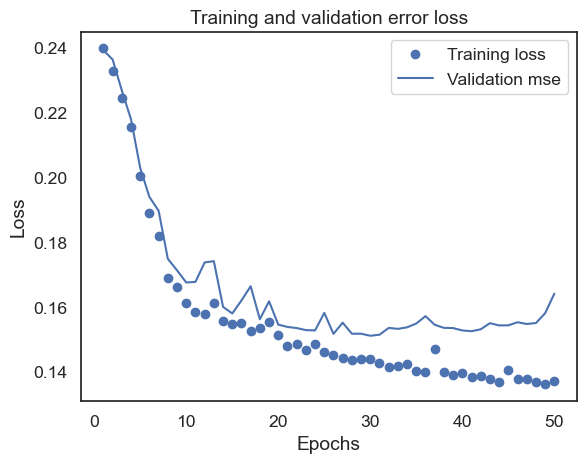

In [31]:
history_dict = a_history.history
acc = history_dict["mse"]
val_acc = history_dict["val_mse"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training loss")
plt.plot(epochs, val_acc, "b", label="Validation mse")
plt.title("Training and validation error loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [32]:
a_predict = a_model.predict(X_test)
a_predict = (a_predict >= 0.7).astype(int) # testing for label prediction

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [33]:
# Compare predictions with test labels
count = 0
for i in range(len(a_predict)):
    if i < 15:
        print(f'{i} - Prediction: {a_predict[i]}   Actual: {y_test_arr[i]}')
    if a_predict[i] == y_test_arr[i]:
        count += 1
print()
print(f'Correct:  {count} | Total: {len(a_predict)}')
print(f'Accuracy: {count/len(a_predict):.4f}')

0 - Prediction: [0]   Actual: [0]
1 - Prediction: [0]   Actual: [0]
2 - Prediction: [0]   Actual: [0]
3 - Prediction: [1]   Actual: [0]
4 - Prediction: [0]   Actual: [1]
5 - Prediction: [1]   Actual: [1]
6 - Prediction: [0]   Actual: [1]
7 - Prediction: [1]   Actual: [1]
8 - Prediction: [0]   Actual: [1]
9 - Prediction: [1]   Actual: [1]
10 - Prediction: [1]   Actual: [1]
11 - Prediction: [1]   Actual: [1]
12 - Prediction: [0]   Actual: [1]
13 - Prediction: [0]   Actual: [0]
14 - Prediction: [0]   Actual: [1]

Correct:  112 | Total: 152
Accuracy: 0.7368


#### Change of loss function

In [34]:
# Compile the model
a_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
b_history = a_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7816 - loss: 0.4503 - val_accuracy: 0.7171 - val_loss: 0.4925
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7918 - loss: 0.4434 - val_accuracy: 0.7171 - val_loss: 0.4931
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7776 - loss: 0.4509 - val_accuracy: 0.7566 - val_loss: 0.4852
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7601 - loss: 0.4380 - val_accuracy: 0.7303 - val_loss: 0.5039
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7720 - loss: 0.4760 - val_accuracy: 0.7368 - val_loss: 0.4886
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7919 - loss: 0.4502 - val_accuracy: 0.7368 - val_loss: 0.4877
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.4889 - val_accuracy: 0.7039 - val_loss: 0.4948
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8029 - loss: 0.4266 - val_accuracy: 0.7566 - val_loss

In [35]:
# Evaluate the model
accuracy = a_model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7083 - loss: 0.5189 
Test accuracy: [0.4990064203739166, 0.7302631735801697]


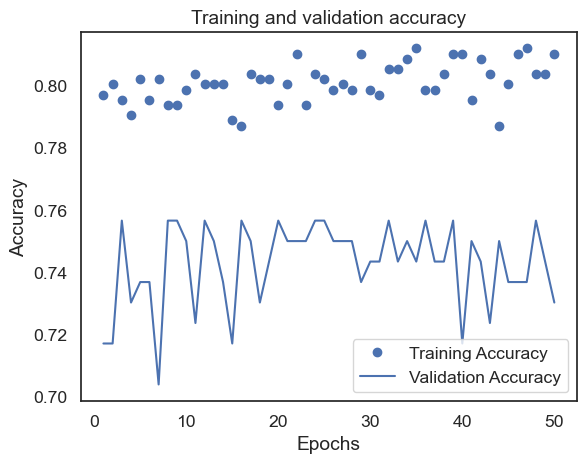

In [36]:
history_dict = b_history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
# returning to 0.5 cut-off
b_predict = a_model.predict(X_test)
b_predict = (b_predict >= 0.5).astype(int) # testing for label prediction

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x13e796b60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [38]:
# Compare predictions with test labels
count = 0
for i in range(len(b_predict)):
    if i < 15:
        print(f'{i} - Prediction: {b_predict[i]}   Actual: {y_test_arr[i]}')
    if b_predict[i] == y_test_arr[i]:
        count += 1
print()
print(f'Correct:  {count} | Total: {len(b_predict)}')
print(f'Accuracy: {count/len(b_predict):.4f}')

0 - Prediction: [0]   Actual: [0]
1 - Prediction: [0]   Actual: [0]
2 - Prediction: [0]   Actual: [0]
3 - Prediction: [1]   Actual: [0]
4 - Prediction: [0]   Actual: [1]
5 - Prediction: [1]   Actual: [1]
6 - Prediction: [0]   Actual: [1]
7 - Prediction: [1]   Actual: [1]
8 - Prediction: [0]   Actual: [1]
9 - Prediction: [1]   Actual: [1]
10 - Prediction: [1]   Actual: [1]
11 - Prediction: [1]   Actual: [1]
12 - Prediction: [0]   Actual: [1]
13 - Prediction: [0]   Actual: [0]
14 - Prediction: [0]   Actual: [1]

Correct:  111 | Total: 152
Accuracy: 0.7303


### Step 10 - Compare predictions to test labels and accuracy of results

<ul>
<li>Increasing the depth of the NN (adding hidden layers) and changing the optimizer increased model accuracy.</li>
<li>Tuning model results in faster convergence of mitigated loss.</li>
<li>Mixing activation functions allows for variation in pattern recognition. Otherwise a linear fucntion network will only output a linear funtion.</li>
<li>Even by increasing the cut-off requirement, the model results outperform a smaller depth NN.</li>
<li>At 35 epochs there appears a point of diminishing returns on error loss.</li>
<li>ReLU is commonly used activation function for deep learning for it's proven accuracy, but using sigmoid for the output activation function when output is between 0 and 1 should improve prediction performance because output is single probability (binary classification); however, for dataset, ReLU and a linear output function with the same number of nodess outperforms the sigmoid out function, which is likely because predicted classifications did not change due to the 0.5 threshold, meaning that a slight learning rate has little impact on the weight changed and there the partial derivative of the loss below the threshold will be zero so gradient descent stops.</li>
</ul>